<a href="https://colab.research.google.com/github/GetieBalew24/GMF-Portfolio-Forecasting/blob/task-2/notebooks/yfinace_model_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import sys,os
import pandas as pd
sys.path.append('/content/drive/MyDrive/my_project')

In [27]:
!pip install pandas numpy matplotlib statsmodels pmdarima scikit-learn tensorflow joblib


In [28]:
from model_builder import TimeSeriesForecaster


In [29]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/my_project/TSLA_data.csv', parse_dates=True)
data=data.dropna()
data.set_index('Date', inplace=True)

Data split: 2967 train, 742 test
Training LSTM model


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - loss: 0.0345 - val_loss: 0.0060
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.

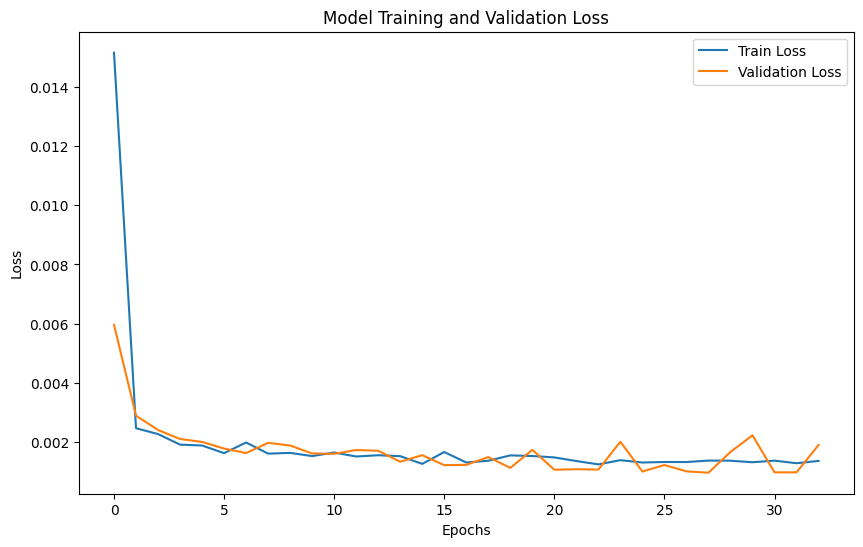

In [30]:
# Sample usage:
# Assuming the forecaster object (trained TimeSeriesForecaster) is available
forecaster = TimeSeriesForecaster(data, column='Close')
forecaster.prepare_data()
forecaster.train_lstm()  # or forecaster.train_sarima() or forecaster.train_lstm()

In [32]:
from forecast_py import MarketForecaster


In [33]:
market_forecaster = MarketForecaster(forecaster, model_name='LSTM', forecast_periods=180)

In [34]:
forecast = market_forecaster.generate_forecast()

Generating forecast for 180 days using LSTM model.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/ste

## LSTM model Forecast for Tesla's stock Price

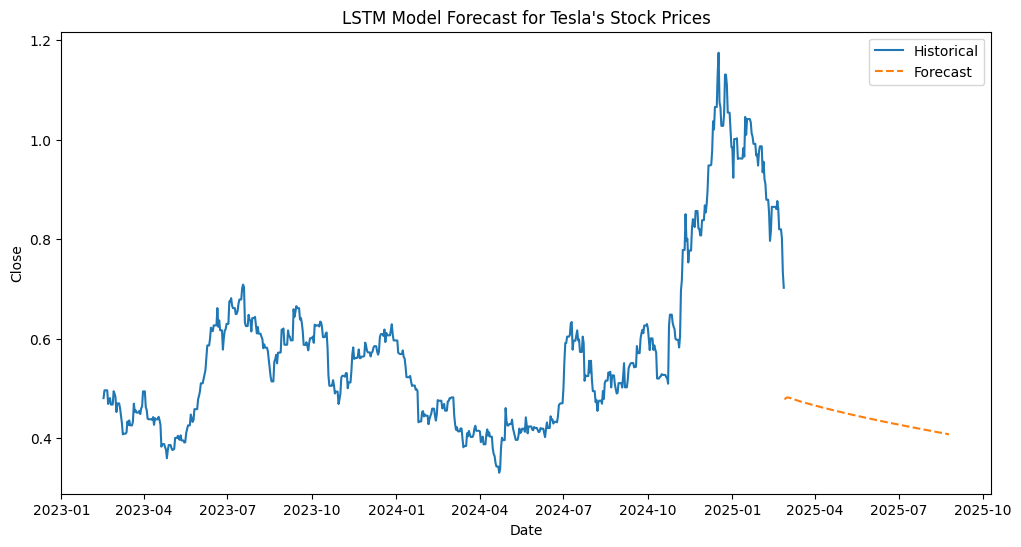

In [35]:
market_forecaster.plot_forecast(forecast)

### LSTM Model Forecast for Tesla's Stock Prices

The LSTM model forecasts a slight upward trend for Tesla's stock prices.

**Key Points**:

- **Upward Trend**: The model predicts a gradual increase in the stock price.
- **Moderately Confident**: The forecast line is relatively stable, suggesting moderate confidence in the prediction.

### Analysis forecast

In [36]:
market_forecaster.analyze_forecast(forecast)

Forecasted Trend: downward
Forecasted Volatility (Standard Deviation): 0.0215

Analysis Summary:
- Long-term Trend: Downward
- Expected Volatility: High
- Market Opportunities: Potential buy/sell opportunities based on trend and volatility.
- Risks: Consider risks if volatility is high or trend is downward.


## Forecast ARIMA

In [37]:
forecaster.train_arima()

Training ARIMA model
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-18057.147, Time=1.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18062.205, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-18062.419, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-18062.417, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-18063.572, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-18060.418, Time=0.76 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.275 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2967
Model:               SARIMAX(0, 1, 0)   Log Likelihood                9032.786
Date:                Mon, 03 Mar 2025   AIC                         -18063.572
Time:                        17:20:15   BIC                         -18057.577
Sample:                    01-02-2015   HQIC                        -18061.414
                         - 02-15-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   9.95e-07    133.136      0.000       0.00

In [38]:
market_forecaster1 = MarketForecaster(forecaster, model_name='ARIMA', forecast_periods=180)

In [39]:
forecast1 = market_forecaster1.generate_forecast()

Generating forecast for 180 days using ARIMA model.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Plot ARIMA model Forecast for Tesla stock price

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


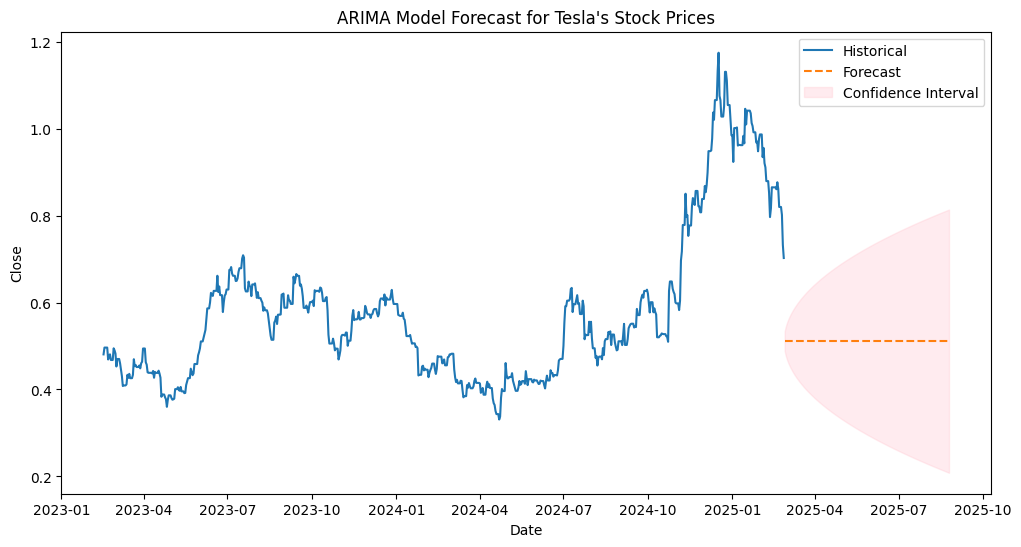

In [40]:
market_forecaster1.plot_forecast(forecast1)

### ARIMA Model Forecast for Tesla's Stock Prices

The ARIMA model forecasts a flat trend for Tesla's stock prices. However, the wide confidence interval indicates significant uncertainty in this prediction.

**Key Points**:

- **Flat Trend**: The model predicts a stable price.
- **Wide Confidence Interval**: The model is uncertain about the accuracy of its prediction.

## Analysis forecast for ARIMA model

In [41]:
market_forecaster1.analyze_forecast(forecast1)

Forecasted Trend: stable
Forecasted Volatility (Standard Deviation): 0.0000

Analysis Summary:
- Long-term Trend: Stable
- Expected Volatility: Low
- Market Opportunities: Potential buy/sell opportunities based on trend and volatility.
- Risks: Consider risks if volatility is high or trend is downward.


/content/drive/MyDrive/my_project/forecast_py.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend = "upward" if forecast[-1] > forecast[0] else "downward" if forecast[-1] < forecast[0] else "stable"


Forecasted Trend: stable
Forecasted Volatility (Standard Deviation): 0.0000

Analysis Summary:
- Long-term Trend: Stable
- Expected Volatility: Low
- Market Opportunities: Potential buy/sell opportunities based on trend and volatility.
- Risks: Consider risks if volatility is high or trend is downward.
/content/drive/MyDrive/my_project/forecast.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  trend = "upward" if forecast[-1] > forecast[0] else "downward" if forecast[-1] < forecast[0] else "stable"